## Canadian Survey on Early Learning and Child Care: Public Use Microdata File Analysis (2023)

This notebook is an analysis of the Canadian Survey on Early Learning and Child Care (CSELCC). This analysis is my own, and is not endorsed by Statistics Canada.

### **Citation:**

Canadian Survey on Early Learning and Child Care: Public Use Microdata File, 2023
https://doi.org/10.25318/37250002-eng

### Data License:
This is a [PUMF](https://www.statcan.gc.ca/en/microdata/pumf/application/section). It is available under a license that is more restrictive than other datasets. As a result I'm simply sharing the original link, instead of publicly uploading it to Kaggle, for simplicity.

### Survey Background:
The original survey was called the Canadian Survey on Early Learning and Child Care ([CSELCC](https://www23.statcan.gc.ca/imdb/p2SV.pl?Function=getSurvey&amp;SDDS=5371)). 

"The survey asks parents and guardians about the arrangements they use for their child aged 0 to 5, including the associated costs, the difficulties they may have faced when looking for care, and what their preferences for child care are." - Survey Description

### User Guide Notes:

#### Imputation:
- Apparently **missing household incomes** were imputed in some cases. Not sure if these are marked by another column.
- Also a small number of cases where imputation was down for questions users deemed confusing.
- All imputation was undertaken using SAS 9.4.

#### Sampling Errors:
- Alberta Response Rate: 49.4%

#### Survey Weights and Bootstrap Weights:
Fancy Weighting? Need to read into this more.

### TODO:
- Analysis that would matter to a business in Alberta.
- What is the bsw extension? Before school watch? Timeline data?
- Just focus on Alberta?
- Which parts of the user guide are relevant to add?
- figure out what normal and bsw are
- read names and stuff
- change names for easy use

In [3]:
library(tidyverse) # metapackage of all tidyverse packages
library(reader)
library(dplyr)

list.files(path = "../input")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: NCmisc


Attaching package: ‘reader’


The following objects are masked from ‘package:NCmisc’:

    cat.path, get.ext, rmv.ext




[1] "statcan-early-learning-and-childhood-dev"

### Data Loading:

In [4]:
data <- read_csv("/kaggle/input/statcan-early-learning-and-childhood-dev/2023_CSV/Data_donnees/cselcc2023ecagje_p.csv", show_col_types = FALSE)
bsw_data <- read_csv("/kaggle/input/statcan-early-learning-and-childhood-dev/2023_CSV/Data_donnees/cselcc2023ecagje_p_bsw.csv", show_col_types = FALSE)

In [9]:
nrow(bsw_data)
nrow(data)
ncol(bsw_data)
ncol(data)

[1] 29718

[1] 29718

[1] 1001

[1] 167

The normal data file has way less columns?

In [5]:
head(data, 3)

PUMFID,WTPP,NCHILD_R,SPFLAGR,AGE_PMKR,AGE_SPR,CH_AGE,PROV,ARR_05,ARR_10AR,⋯,WLB_01R,WLB_02R,WLB_03R,IID_HH,VISMINHH,PBP_HH,IM_HH,ED_PMKR,ED_SPR,HHINCR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2438,17.2098,2,2,3,3,3,12,2,6,⋯,5,5,5,2,2,2,2,3,3,7
2439,129.6971,2,2,2,3,1,35,2,6,⋯,6,6,6,2,1,1,2,3,3,7
2445,21.1646,9,1,2,6,2,10,1,2,⋯,3,4,2,2,2,2,2,1,6,1


In [6]:
head(bsw_data, 3)

PUMFID,WRPP1,WRPP2,WRPP3,WRPP4,WRPP5,WRPP6,WRPP7,WRPP8,WRPP9,⋯,WRPP991,WRPP992,WRPP993,WRPP994,WRPP995,WRPP996,WRPP997,WRPP998,WRPP999,WRPP1000
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2438,15.6567,0.6412,49.7667,17.6623,0.7061,0.6965,71.2488,0.7381,17.3734,⋯,0.6341,16.2858,33.0526,0.6735,0.6189,32.7554,17.7758,34.4452,0.6958,17.4311
2439,263.2978,0.0000,0.0000,248.4983,137.2159,0.0000,253.2019,269.4545,125.7407,⋯,574.6584,0.0000,127.4572,133.7022,0.0000,129.4986,128.5603,251.5585,0.0000,129.9676
2445,22.2639,2.2610,2.1477,23.9394,44.3763,23.0905,42.9184,2.2570,45.9321,⋯,2.2789,2.1460,45.6978,44.3124,2.1671,22.9121,2.3043,22.6680,2.2082,2.2073


BSW data appears to be some sort of timeline based data maybe?

#### Missing Data: First Check

In [11]:
sum(is.na(data))
sum(is.na(bsw_data))

[1] 0

[1] 0

In [18]:
count_duplicated <- data %>%
  filter(duplicated(.)) %>%
  summarise(count = n())

count_duplicated_bsw <- bsw_data %>%
  filter(duplicated(.)) %>%
  summarise(count = n())

print(count_duplicated)
print(count_duplicated_bsw)

# A tibble: 1 × 1
  count
  <int>
1     0
# A tibble: 1 × 1
  count
  <int>
1     0


Apparently no missing or duplicated data.

### Column Codebook:
I think I want to add the column names of interest, and maybe drill down to just Alberta?

In [10]:
head(data, 3)

PUMFID,WTPP,NCHILD_R,SPFLAGR,AGE_PMKR,AGE_SPR,CH_AGE,PROV,ARR_05,ARR_10AR,⋯,WLB_01R,WLB_02R,WLB_03R,IID_HH,VISMINHH,PBP_HH,IM_HH,ED_PMKR,ED_SPR,HHINCR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2438,17.2098,2,2,3,3,3,12,2,6,⋯,5,5,5,2,2,2,2,3,3,7
2439,129.6971,2,2,2,3,1,35,2,6,⋯,6,6,6,2,1,1,2,3,3,7
2445,21.1646,9,1,2,6,2,10,1,2,⋯,3,4,2,2,2,2,2,1,6,1


### Use of Weights in Analysis
- How do these actually get used LLM say?
- Is this not mentioned in textbooks?
- What about forums/reddit?

### Basic Analysis

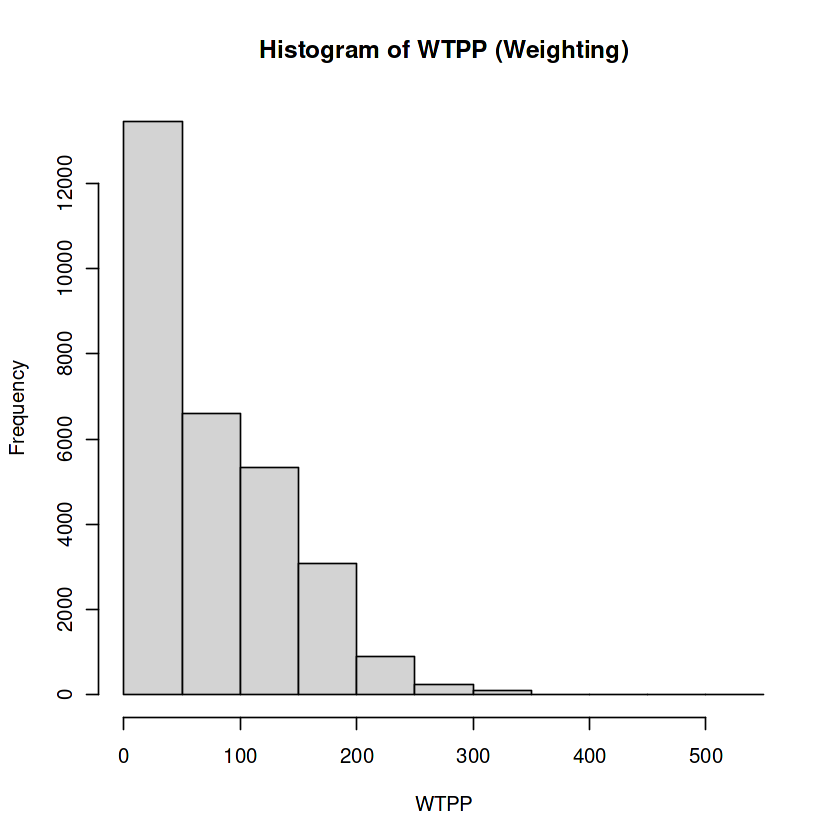

In [17]:
hist(data$WTPP, main = "Histogram of WTPP (Weighting)", xlab = "WTPP", ylab = "Frequency")

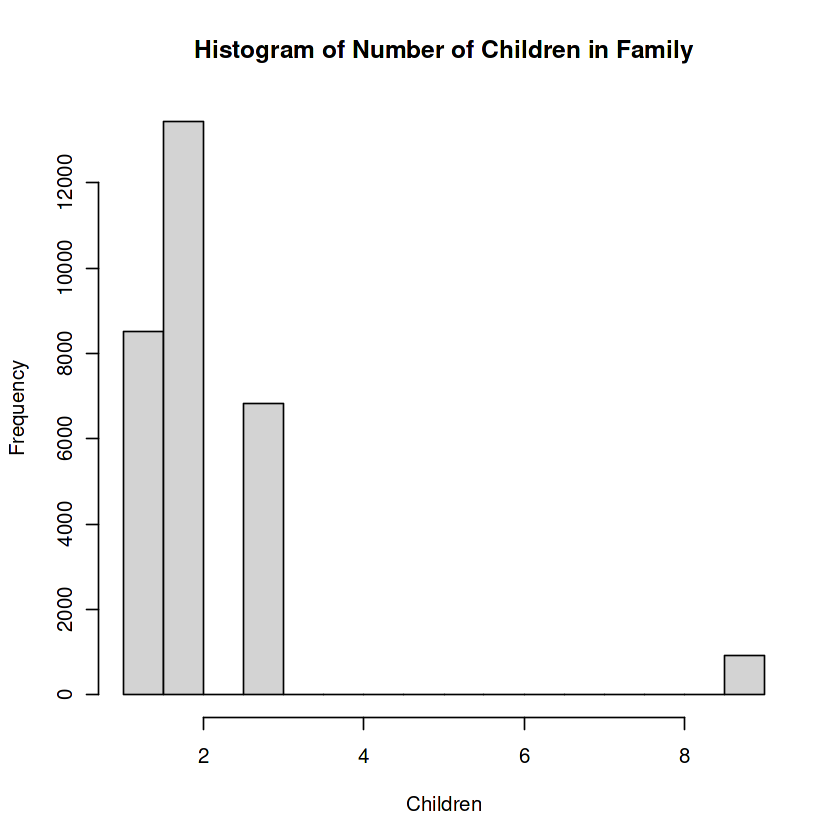

In [18]:
hist(data$NCHILD_R, main = "Histogram of Number of Children in Family", xlab = "Children", ylab = "Frequency")

Super weird outlier around 8. Need to look at that.

In [60]:
SPFLAGR_value_counts <- table(data$SPFLAGR)
SPFLAGR_value_percent <- SPFLAGR_value_counts / nrow(data)
names(SPFLAGR_value_percent) <- c("no_spouse", "spouse")

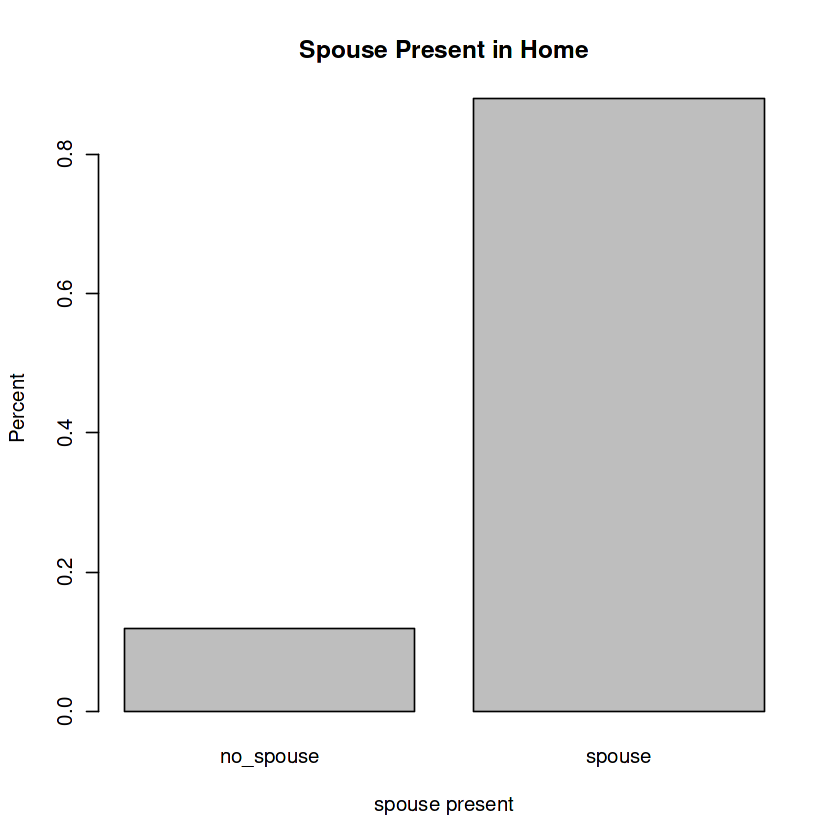

In [68]:
barplot(SPFLAGR_value_percent, main="Spouse Present in Home", xlab="spouse present", ylab="Percent", width = 0.5)

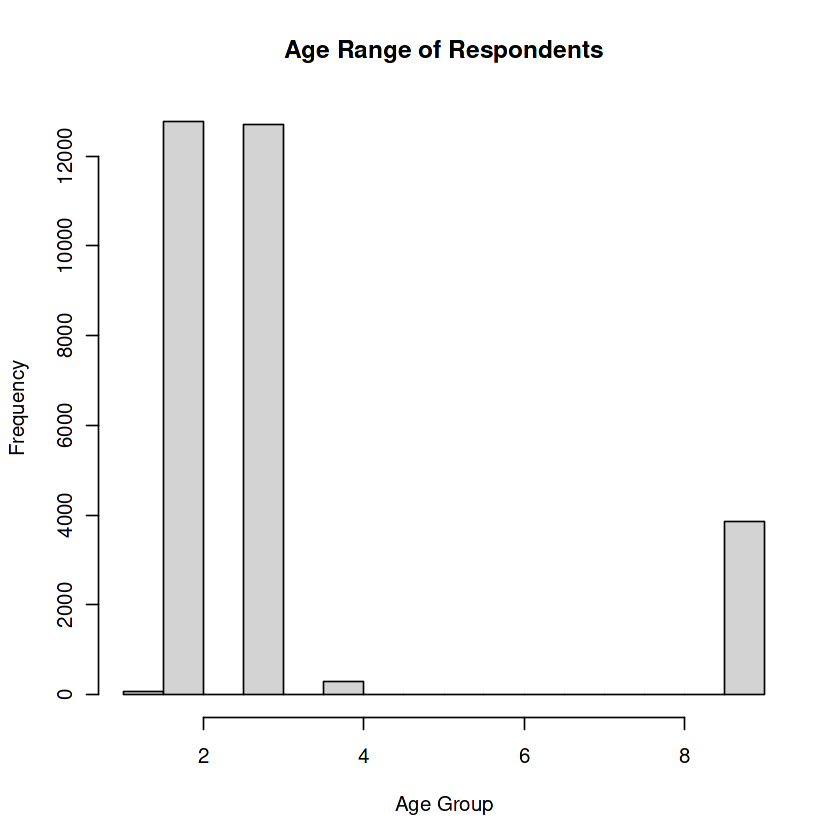

In [73]:
# i want to turn this into a count and percent
hist(data$AGE_PMKR, main = "Age Range of Respondents", xlab = "Age Group", ylab = "Frequency")

- 15 to 24 years old 1
- 25 to 34 years old 2
- 35 to 44 years old 3
- 45 years or older 4
- Not stated 9

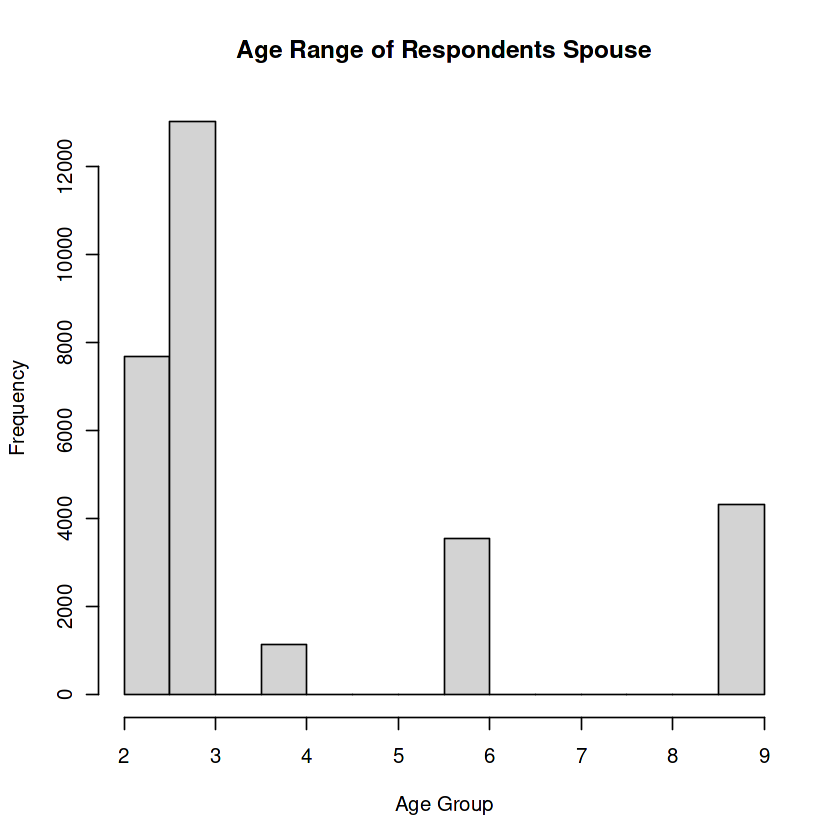

In [75]:
hist(data$AGE_SPR, main = "Age Range of Respondents Spouse", xlab = "Age Group", ylab = "Frequency")

### Deliberate Analysis:
- What do i Care about?
- Isolate out Alberta?

### Alberta Analysis

In [78]:
alberta_df <- data %>%
    filter(PROV == 48)

In [80]:
head(alberta_df)

PUMFID,WTPP,NCHILD_R,SPFLAGR,AGE_PMKR,AGE_SPR,CH_AGE,PROV,ARR_05,ARR_10AR,⋯,WLB_01R,WLB_02R,WLB_03R,IID_HH,VISMINHH,PBP_HH,IM_HH,ED_PMKR,ED_SPR,HHINCR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2484,93.5717,3,2,3,3,3,48,1,2,⋯,3,2,4,2,1,1,2,3,3,7
2529,79.9264,2,2,2,3,2,48,1,1,⋯,6,6,6,2,1,1,1,3,3,6
2597,78.9734,1,2,2,2,1,48,1,1,⋯,3,2,3,2,2,2,2,3,3,7
2613,33.6674,1,2,2,2,1,48,2,6,⋯,6,6,6,2,2,2,2,3,1,6
2617,93.5717,3,2,3,3,3,48,2,6,⋯,1,1,5,2,2,2,2,1,2,6
2647,82.1727,2,2,3,3,1,48,1,2,⋯,4,2,2,2,2,2,2,3,2,7
